In [1]:
import requests
from pandas.io.json import json_normalize
import pandas as pd
import missingno as msno 
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy import stats
import time
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [2]:
#!ls

In [28]:
#dfraw['vehicle.id'].value_counts()
#dfraw['owner.id'].value_counts().head()
df1 = pd.read_csv("TuroRawData_170airportsDupliRemoved.csv")

In [29]:
cols = ['fuelType', 'rating', 'renterTripsTaken', 'reviewCount', 'location.city', 'location.country', 
        'location.latitude', 'location.longitude', 'location.state',  'owner.id', 
        'rate.daily', 'vehicle.make',
       'vehicle.model', 'vehicle.type', 'vehicle.year', 'airportcity']

In [30]:
#dfall.fillna(0, inplace=True)
df1.to_csv("CarRentalDataV1.csv", mode='w', columns=cols, index=False)

In [31]:
#dfall.isna().sum()

In [32]:
#dfall['airportcity'].value_counts()

In [33]:
#dfall.keys()

In [34]:
dfall = pd.read_csv("CarRentalDataV1.csv")

In [35]:
dfall.keys()

Index(['fuelType', 'rating', 'renterTripsTaken', 'reviewCount', 'location.city', 'location.country', 'location.latitude', 'location.longitude', 'location.state', 'owner.id', 'rate.daily', 'vehicle.make', 'vehicle.model', 'vehicle.type', 'vehicle.year', 'airportcity'], dtype='object')

Text(0.5, 0, 'daily rate (dollars per day)')

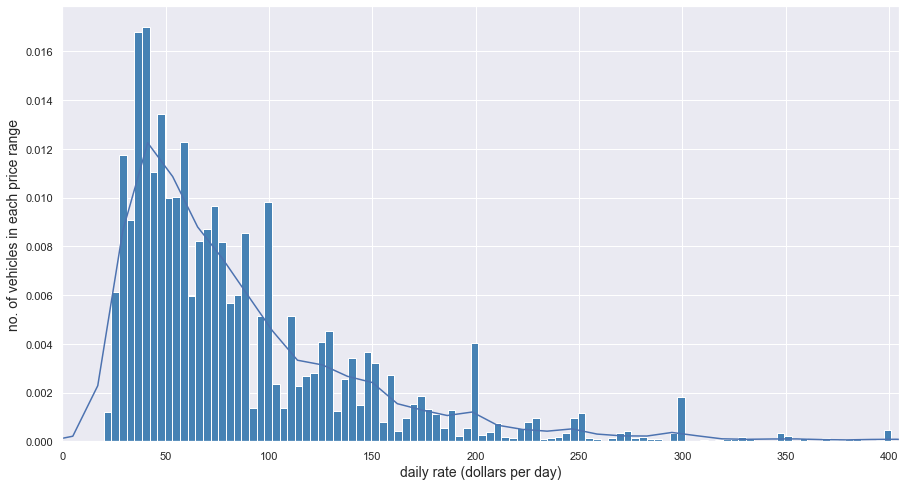

In [36]:
#sns.set(font_scale=1.3)
#sns.set(style="darkgrid", palette="muted")
#sns.palplot(sns.color_palette("Blues"))
#sns.set_color_codes("pastel")
a4_dims = (15, 8)
x = dfall['rate.daily']
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.distplot(x, 
             bins=400, 
             kde=True, color='b', 
             #rug=True,
            hist_kws={"alpha":None, "color":'steelblue'}
            )
plt.xlim(0, 405)
ax.set_ylabel('no. of vehicles in each price range', fontsize=14)
ax.set_xlabel('daily rate (dollars per day)', fontsize=14)

#ax.xaxis.grid(True)
#ax.set(ylabel="")
#sns.despine(trim=True, left=True)

In [37]:
#print(x)

Text(0.5, 0, 'daily rate (dollars per day)')

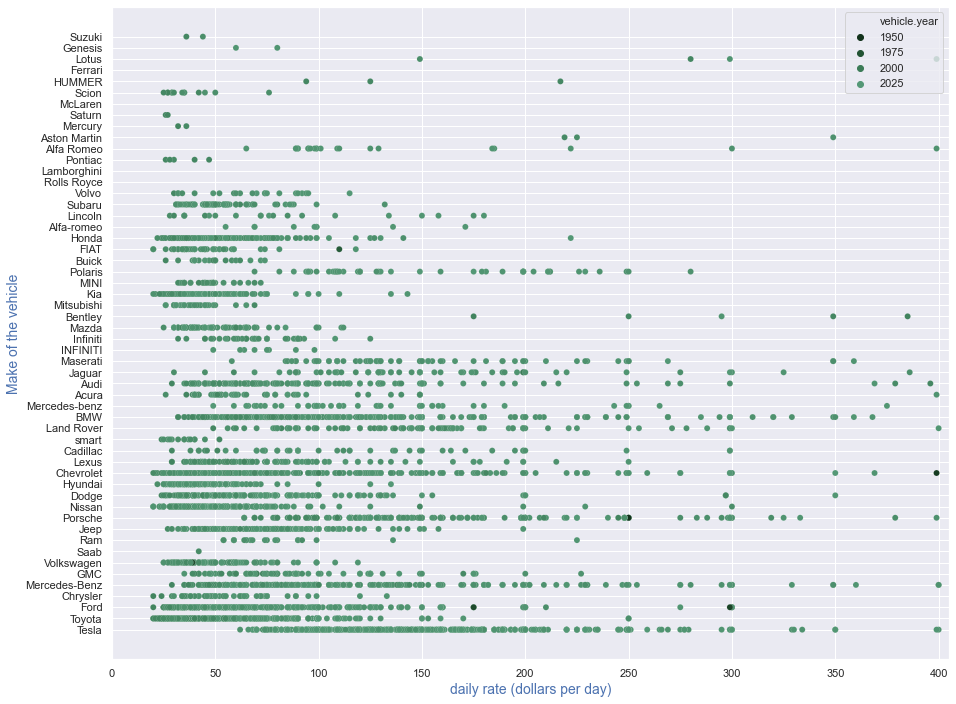

In [38]:
#set_style("xtick.major.size": 8)
#sns.despine(fig, left=True, bottom=True)
sns.set(style="darkgrid")
#sns.set_context("notebook")
a4_dims = (15, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(data=dfall, x='rate.daily', y='vehicle.make', 
                hue='vehicle.year',
                
                #palette="ch:r=-.2,d=.3_r",
                palette="ch:2,r=.1,l=.5_r",
                #hue_order=clarity_ranking,
                #sizes=(1,8), 
                 linewidth=.1,
               # "xtick.major.size": 100
               
               )
plt.xlim(0, 405)
ax.set_ylabel('Make of the vehicle', fontsize=14, color='b')
ax.set_xlabel('daily rate (dollars per day)', fontsize=14, color='b')

In [39]:
#dfall.dtypes

In [40]:
dfall['count']=dfall['vehicle.make'].value_counts()

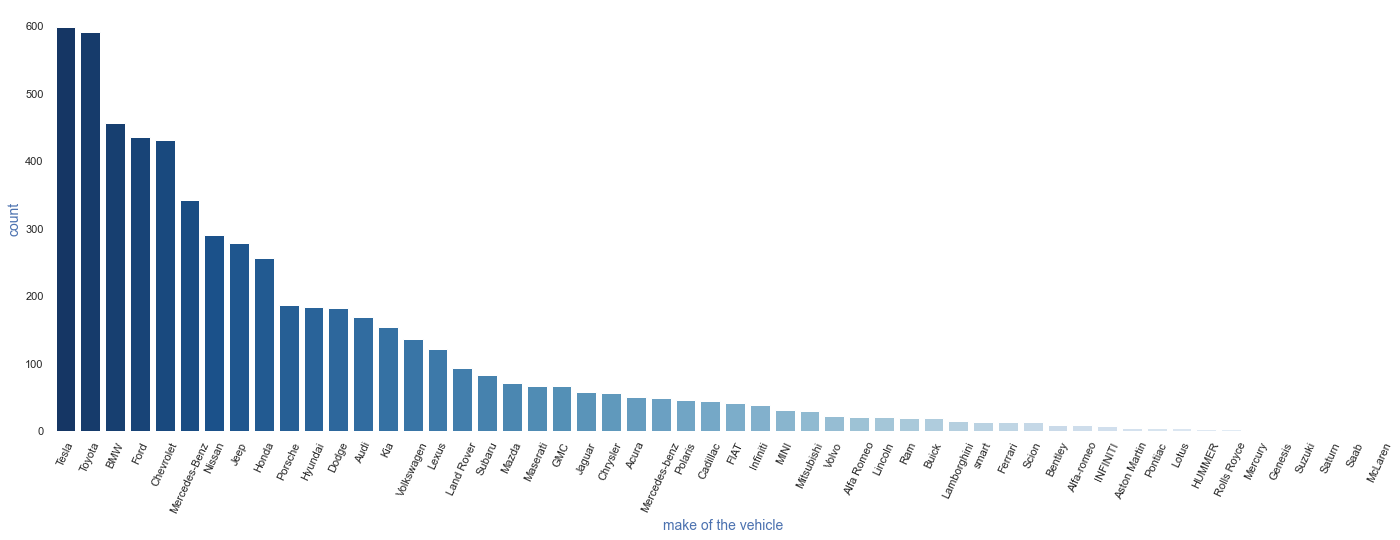

In [41]:
#df1=df.groupby(['vehicle.make']).mean().sort_values(by='rating', ascending=False)
sns.set_context("notebook")
sns.set_color_codes("dark")
sns.set(style="white")

#a4_dimsRel = (24.00, 10.80)
#fig, ax = pyplot.subplots(figsize=a4_dimsRel)
#df.head()
a4_dims = (24.00, 7.80)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.xticks(rotation=65)

sns.countplot(x='vehicle.make', data=dfall,
              order = dfall['vehicle.make'].value_counts().index,
              #hue='vehicle.year'
              palette="Blues_r" #"BrBG" #"cubehelix" #"GnBu_d"    #"BuGn_r"     #"Set2"
           )
ax.set_ylabel('count', fontsize=14, color='b')
ax.set_xlabel('make of the vehicle', fontsize=14, color='b')
plt.savefig('carVsCount.png', format='png')
sns.despine(left=True, bottom=True)

# sns.barplot(x=df['vehicle.make'].unique(), y=df['vehicle.make'].value_counts(), 
#            #palette="rocket"
#            )

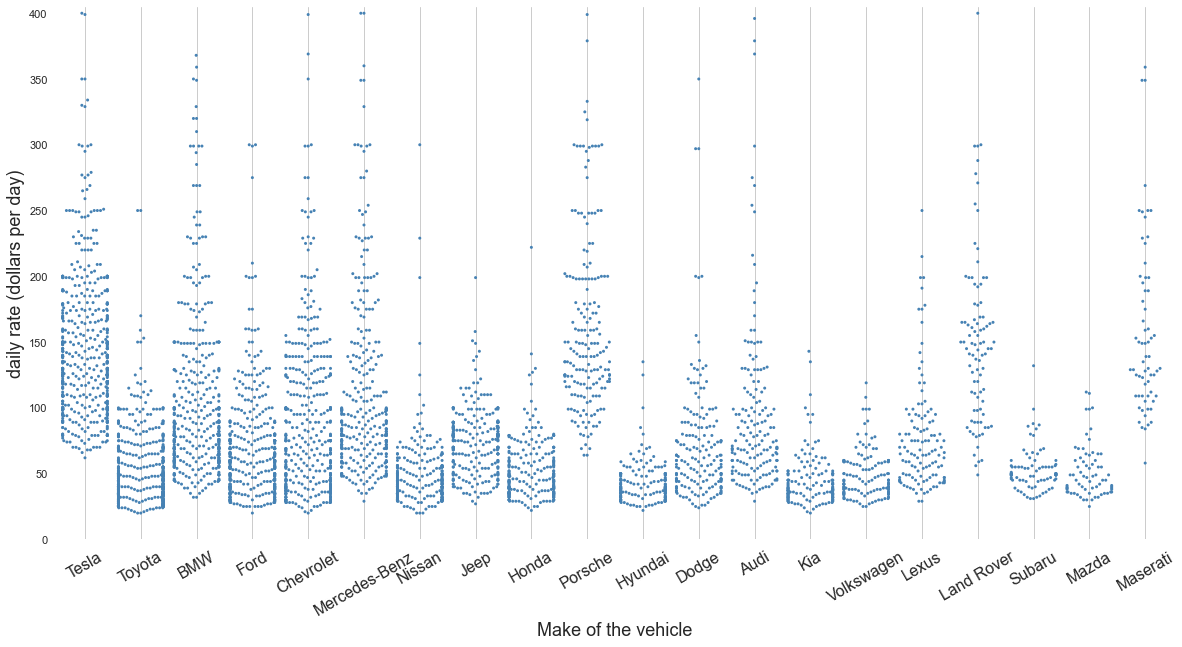

In [42]:
df2 = pd.melt(dfall, "vehicle.make", var_name="rate.daily")

sns.set_context("notebook")
#sns.set_color_codes("dark")
sns.set(style="whitegrid")
#sns.set(style="ticks")

a4_dimsRel = (20.00, 9.80)
fig, ax = pyplot.subplots(figsize=a4_dimsRel)
#sns.set(style="dark")
# Draw a categorical scatterplot to show each observation
sns.swarmplot(y="rate.daily", x="vehicle.make", 
              #hue="vehicle.year",
              #palette= "BuGn_d",   # ["c", "b"], 
              color="steelblue",
              data=dfall,
              order = dfall['vehicle.make'].value_counts().iloc[:20].index,
              size=3, 
              #color=".1", 
              linewidth=0
             
             )

ax.xaxis.grid(True)
ax.yaxis.grid(False)
#ax.set(ylabel="")
sns.despine(#trim=True, 
            left=True, bottom=True)

plt.ylim(0, 405)
plt.xticks(rotation=30, fontsize=16)
#sns.despine(left=True, bottom=True)
ax.set_xlabel('Make of the vehicle', fontsize=18)
ax.set_ylabel('daily rate (dollars per day)', fontsize=18)





plt.savefig('carVsRate.jpg', format='jpg')
#sns.despine(left=True, bottom=True)


Text(0.5, 0, 'daily rate (dollars per day)')

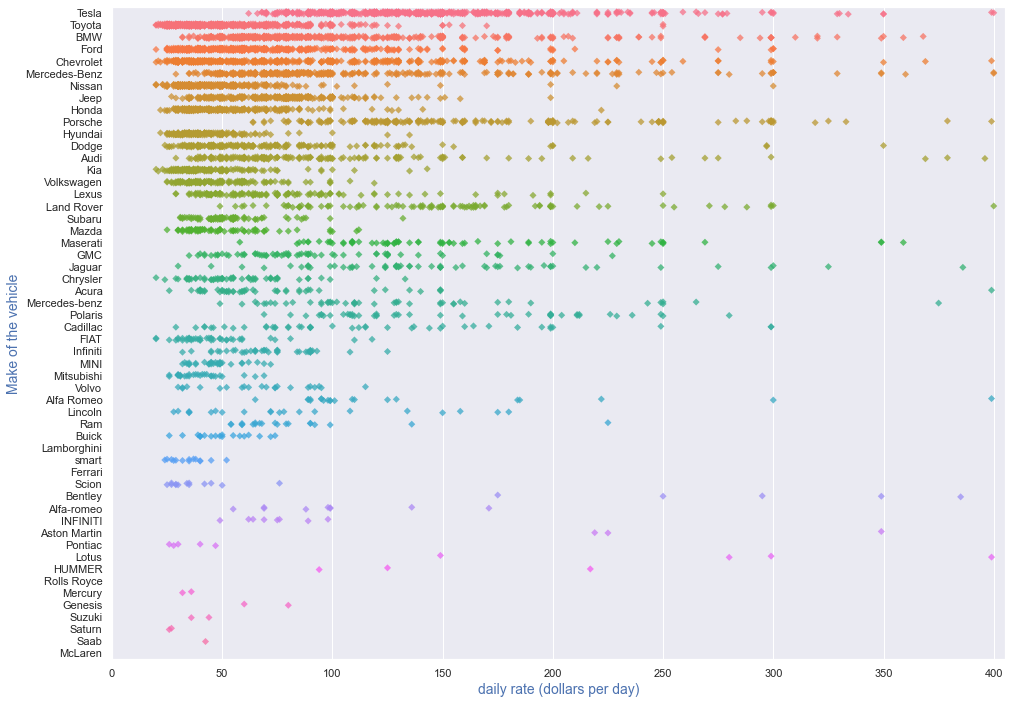

In [43]:
sns.set(style="darkgrid")
a4_dimsRel2 = (16, 12)
fig, ax = pyplot.subplots(figsize=a4_dimsRel2)
sns.stripplot(x="rate.daily", y="vehicle.make",
                #hue="kind",
                data=dfall,
                palette="husl", 
                size=5, 
                marker="D",
                edgecolor="gray", 
                alpha=.75,
                #linewidth=.5,
                #jitter=0.1,
                order = dfall['vehicle.make'].value_counts().index
              
                )
plt.xlim(0, 405)
ax.set_ylabel('Make of the vehicle', fontsize=14, color='b')
ax.set_xlabel('daily rate (dollars per day)', fontsize=14, color='b')

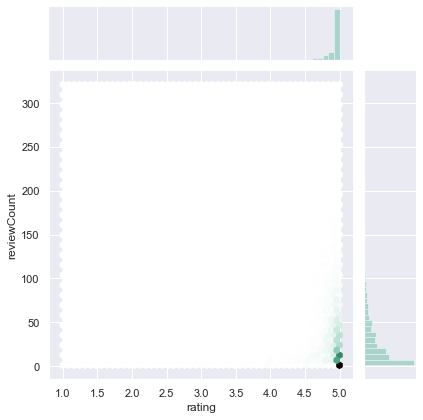

In [44]:
sns.jointplot(x=dfall['rating'], y=dfall['reviewCount'],
                #data=df,
              
              kind="hex", 
              #size= 7,
              color="#4CB391")

#plt.ylim(0,15)
#plt.xlim(0, 40)

Text(0.5, 0, 'daily rate (dollars per day)')

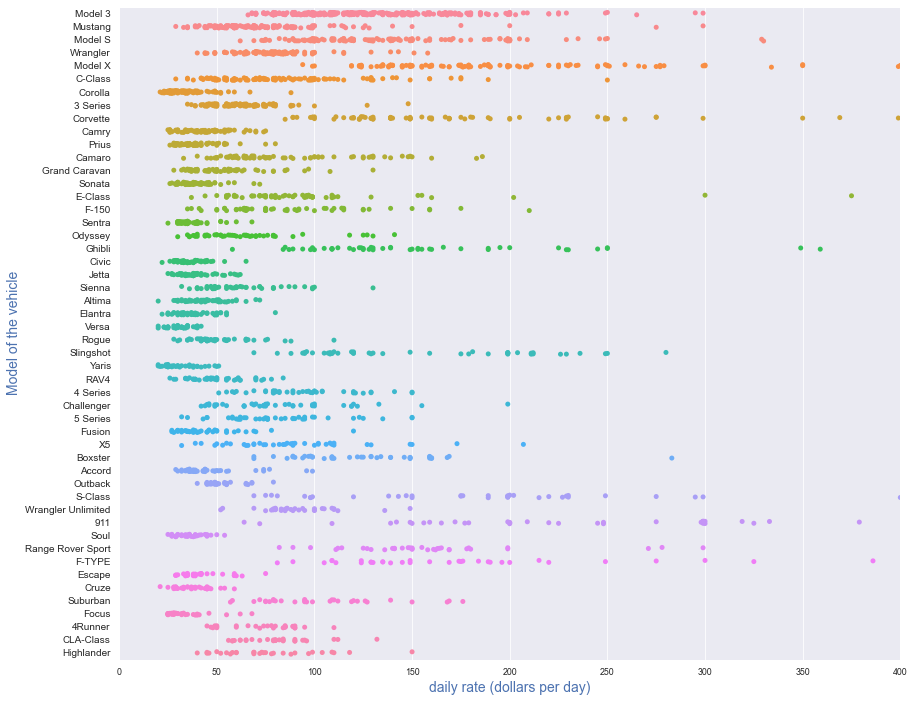

In [45]:
sns.set(style="darkgrid")
sns.set_context("paper")
a4_dimsRel2 = (14, 12)
fig, ax = pyplot.subplots(figsize=a4_dimsRel2)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.stripplot(x="rate.daily", y="vehicle.model", data=dfall,

                 #hue="vehicle.type", 
                 #size="reviewCount",
                 #palette=cmap, 
                 #sizes=(10, 40),
                order = dfall['vehicle.model'].value_counts().iloc[:50].index  #.iloc[:30] before index
                )

#plt.ylim(0,150)
plt.xlim(0, 400)
plt.yticks(fontsize=10)
ax.set_ylabel('Model of the vehicle', fontsize=14, color='b')
ax.set_xlabel('daily rate (dollars per day)', fontsize=14, color='b')

Text(0.5, 0, 'daily rate (dollars per day)')

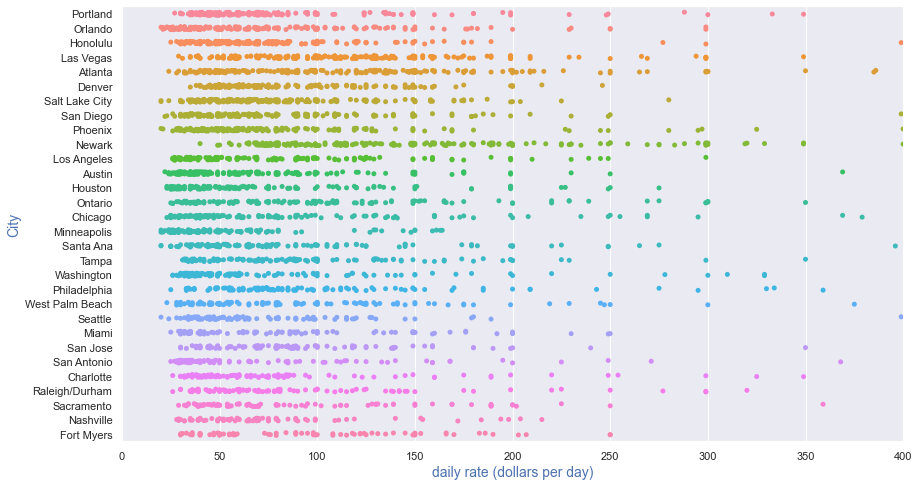

In [46]:
sns.set(style="darkgrid")
a4_dimsRel2 = (14, 8)
fig, ax = pyplot.subplots(figsize=a4_dimsRel2)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.stripplot(x="rate.daily", y="airportcity", data=dfall,

                 #hue="vehicle.type", 
                 #size="reviewCount",
                 #palette=cmap, 
                 #sizes=(10, 40),
                order = dfall['airportcity'].value_counts()\
                 .iloc[:30]\
                  .index
                )

#plt.ylim(0,150)
plt.xlim(0, 400)
ax.set_ylabel('City', fontsize=14, color='b')
ax.set_xlabel('daily rate (dollars per day)', fontsize=14, color='b')

Text(0, 0.5, 'daily rate (dollars per day)')

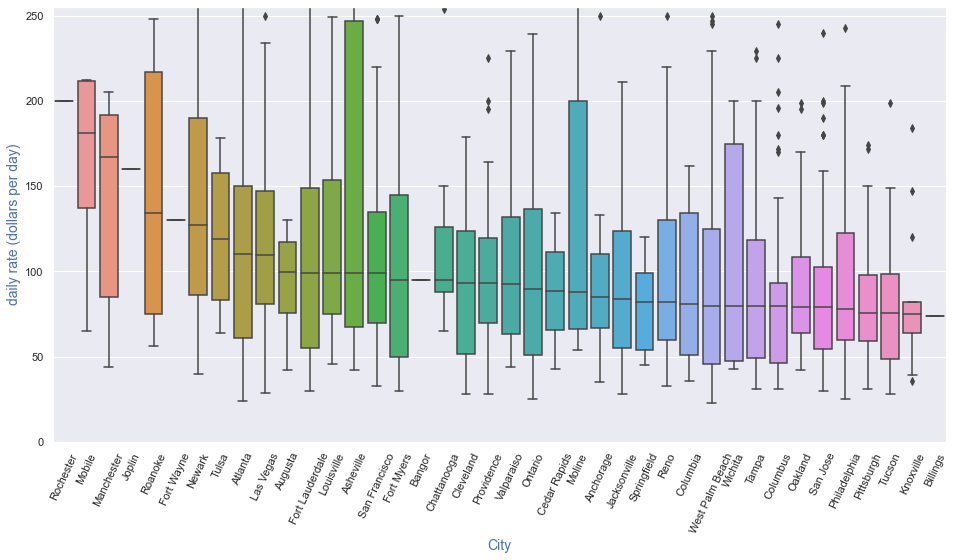

In [47]:
sns.set_context("notebook")
a4_dimsRel = (16, 8)
fig, ax = pyplot.subplots(figsize=a4_dimsRel)
sns.set(style="darkgrid")
# Draw a categorical scatterplot to show each observation
sns.boxplot(y="rate.daily", x="airportcity", 
              #hue="vehicle.year",
               #palette="rocket",   #vlag, deep
              #palette=["c", "b"], 
              data=dfall,
              #order = dfall['airportcity'].value_counts().iloc[:20].index
              order = dfall.groupby(['airportcity']).median()\
               .sort_values('rate.daily', ascending = False).iloc[0:40].index
             
             )
plt.ylim(0, 255)
plt.xticks(rotation=65)
ax.set_xlabel('City', fontsize=14, color='b')
ax.set_ylabel('daily rate (dollars per day)', fontsize=14, color='b')

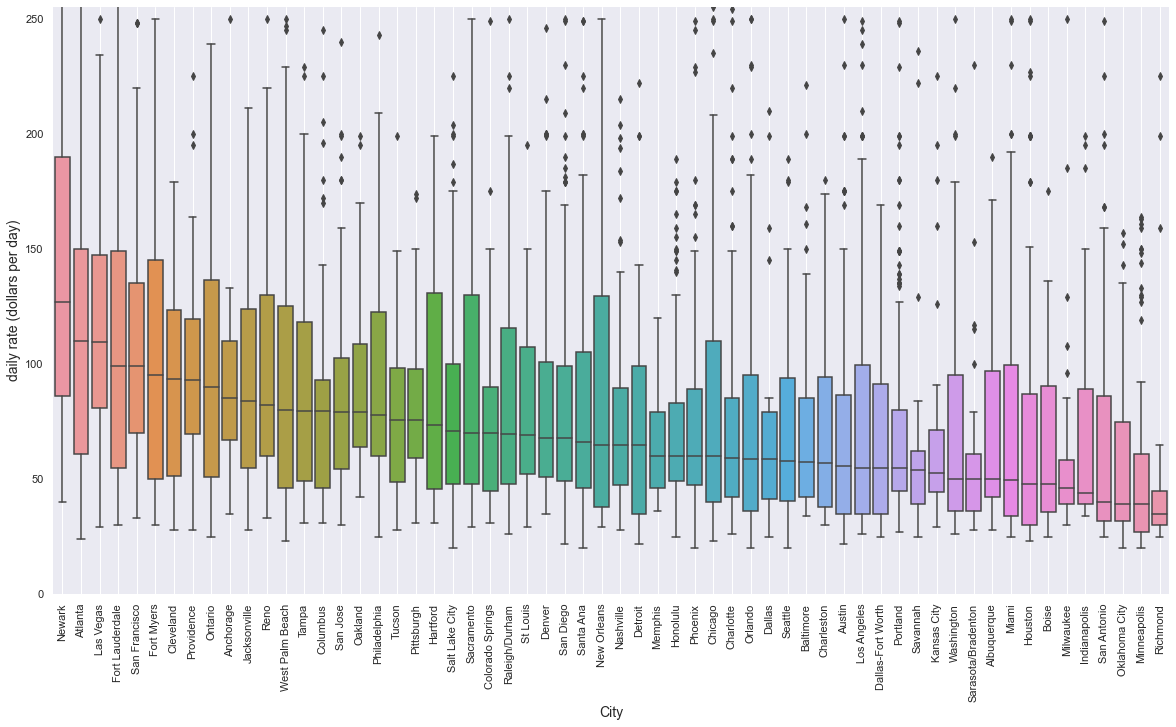

In [48]:
sns.set_context("notebook")
a4_dimsRel = (20.00, 10.80)
fig, ax = pyplot.subplots(figsize=a4_dimsRel)
#sns.set(style="darkgrid")
sns.set(style="whitegrid")
# Draw a categorical scatterplot to show each observation
sns.boxplot(y="rate.daily", x="airportcity", 
              #hue="vehicle.year",
               #palette="rocket",   #vlag, deep
              #palette=["c", "b"], 
              data=dfall.groupby('airportcity').filter(lambda x: len(x) >= 20),
              #order = dfall['airportcity'].value_counts().iloc[:20].index
              order = dfall.groupby('airportcity').filter(lambda x: len(x) >= 20)\
                     .groupby(['airportcity']).median()\
                    .sort_values('rate.daily', ascending = False)\
                    #.iloc[0:50]
                     .index
             
             )

ax.xaxis.grid(True)
ax.yaxis.grid(False)
#ax.set(ylabel="")
sns.despine(#trim=True, 
            left=True, bottom=True)

#plt.ylim(0, 255)
plt.ylim(0, 255)
plt.xticks(rotation=90)
ax.set_xlabel('City', fontsize=14)
ax.set_ylabel('daily rate (dollars per day)', fontsize=14)

#fig = plt.figure(figsize=(19.20,10.80))
plt.savefig('cityVsRate.png', format='png')

#filtered = df.groupby('positions').filter(lambda x: len(x) >= 3)

In [49]:
dfallmean = dfall.groupby('airportcity').filter(lambda x: len(x) >= 10)\
           .groupby(['airportcity']).median().reset_index()
  #.groupby(['airportcity'])
dfallmean.head()

,airportcity,rating,renterTripsTaken,reviewCount,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year,count
0,Albuquerque,4.92,18.0,12.0,35.161777,-106.598445,6744409.0,50.0,2015.0,NaN
1,Anchorage,5.00,7.0,5.5,61.177753,-149.897820,5730154.0,85.0,2015.0,NaN
2,Asheville,5.00,2.0,2.0,35.484634,-82.537440,10354733.0,99.0,2017.0,NaN
3,Atlanta,4.96,23.0,19.0,33.772143,-84.400123,6482788.0,110.0,2016.0,NaN
4,Austin,5.00,19.5,16.0,30.285658,-97.742739,4353395.0,55.5,2016.0,NaN


In [50]:
dfallmean = dfallmean.sort_values('rate.daily', ascending = False)

Text(0, 0.5, 'daily rate (dollars per day)')

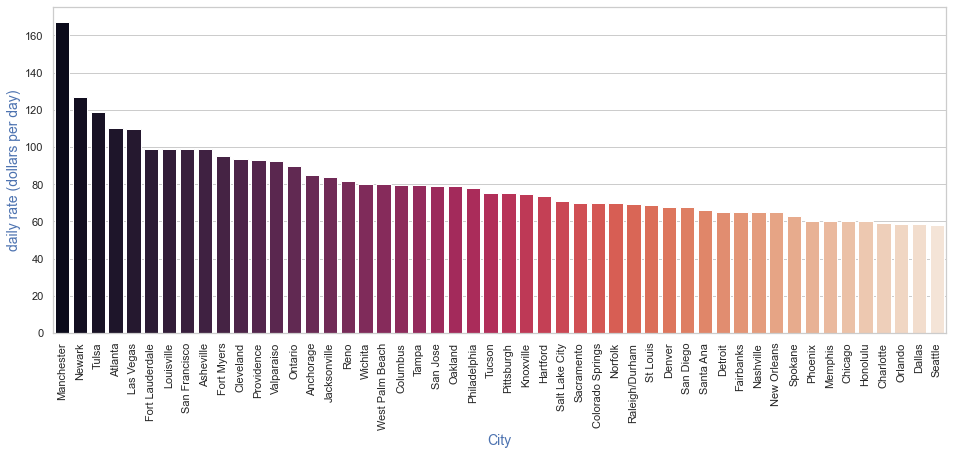

In [51]:
#df1=df.groupby(['vehicle.make']).mean().sort_values(by='rating', ascending=False)

#df.head()
a4_dims = (16, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.xticks(rotation=90)

sns.barplot(x='airportcity', y= 'rate.daily', data=dfallmean[:50],
              #order = dfallmean['rate.daily'].value_counts().iloc[:50].index,
              #hue='vehicle.year'
            palette="rocket"
           )
ax.set_xlabel('City', fontsize=14, color='b')
ax.set_ylabel('daily rate (dollars per day)', fontsize=14, color='b')

# sns.barplot(x=df['vehicle.make'].unique(), y=df['vehicle.make'].value_counts(), 
#            #palette="rocket"
#            )

In [52]:
#'owner.id', 'vehicle.id', 'renterTripsTaken', 'deliveryLabel', 'fuelType',

Text(0.5, 0, 'renterTripsTaken')

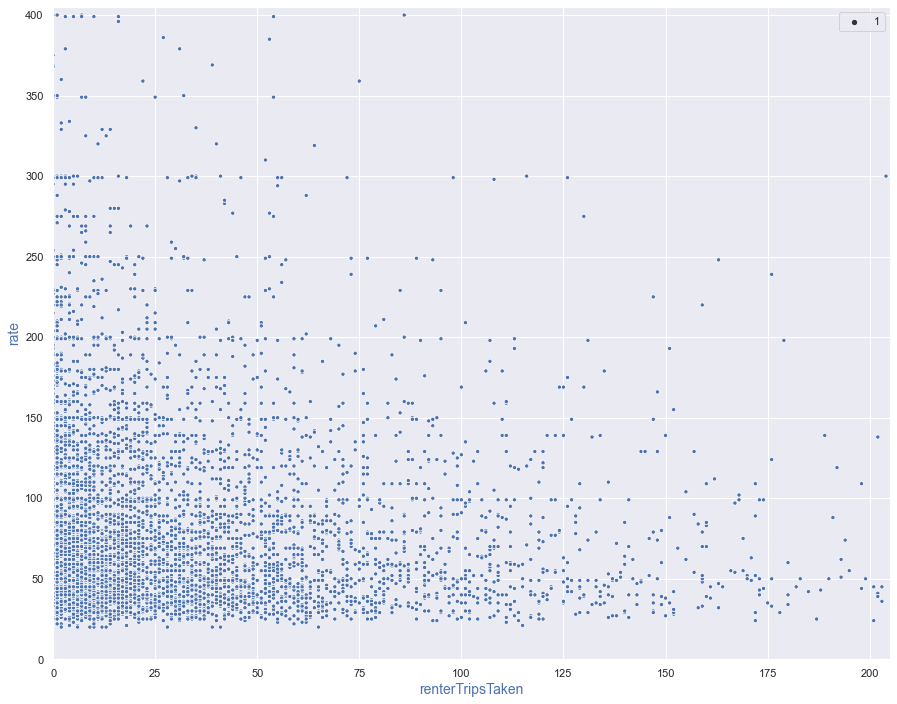

In [53]:
sns.set(style="darkgrid")
#sns.set_context("notebook")
a4_dims = (15, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(data=dfall, x='renterTripsTaken', y='rate.daily', 
                # kind='hex',
                #hue='vehicle.year',
                #palette="ch:r=-.2,d=.3_r",
                palette="ch:2,r=.1,l=.5_r",
                #hue_order=clarity_ranking,
                #sizes=(1,8), 
                 #linewidth=.1,
                   size=1,
               # "xtick.major.size": 100
               )
plt.xlim(0, 205)
plt.ylim(0,405)
ax.set_ylabel('rate', fontsize=14, color='b')
ax.set_xlabel('renterTripsTaken', fontsize=14, color='b')

In [54]:
#dfall['revenue'] = dfall['rate.daily']*dfall['renterTripsTaken']
#df['col_3'] = df.apply(lambda x: f(x.col_1, x.col_2), axis=1)

dfall['revenue'] = dfall.apply(lambda x: x.loc['rate.daily']*x.loc['renterTripsTaken'], axis=1)

In [55]:
#dfall[['rate.daily', 'renterTripsTaken', 'revenue']]

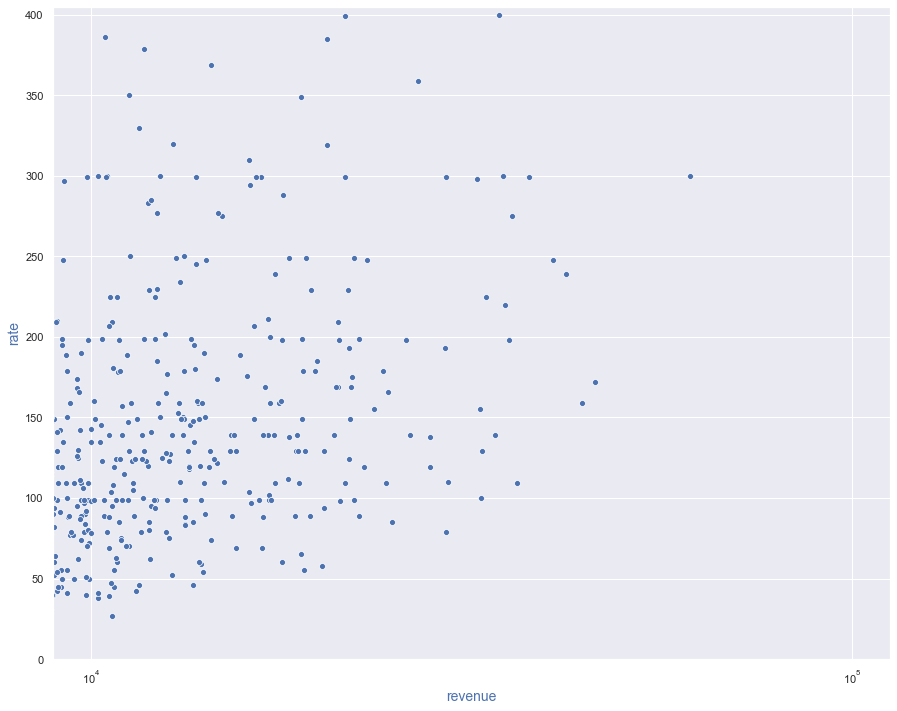

In [56]:
sns.set(style="darkgrid")
#sns.set_context("notebook")
a4_dims = (15, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(data=dfall, x='revenue', y='rate.daily', 
                # kind='hex',
                #hue='vehicle.year',
                #palette="ch:r=-.2,d=.3_r",
                palette="ch:2,r=.1,l=.5_r",
                #hue_order=clarity_ranking,
                #sizes=(1,8), 
                 #linewidth=.1,
                   #size=1,
               # "xtick.major.size": 100
               )
#plt.xlim(0, 30000)
plt.ylim(0,405)
ax.set_ylabel('rate', fontsize=14, color='b')
ax.set_xlabel('revenue', fontsize=14, color='b')
ax.set_xscale('log')
#ax.set_yscale('log')

<AxesSubplot:>

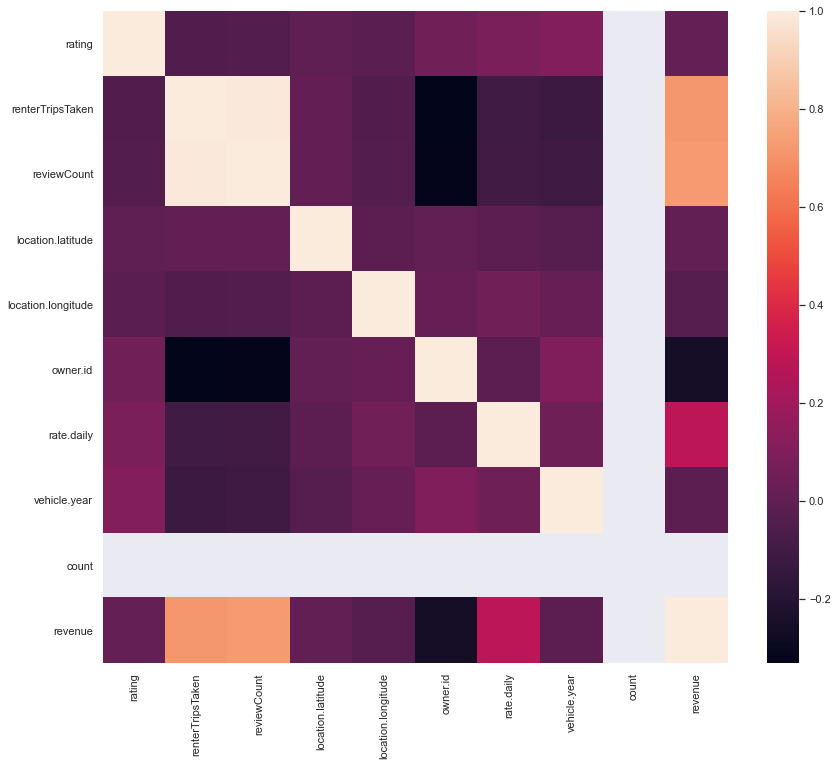

In [57]:

a4_dims = (14, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
# calculate the correlation matrix
corr = dfall.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Text(0.5, 0, 'daily rate (dollars per day)')

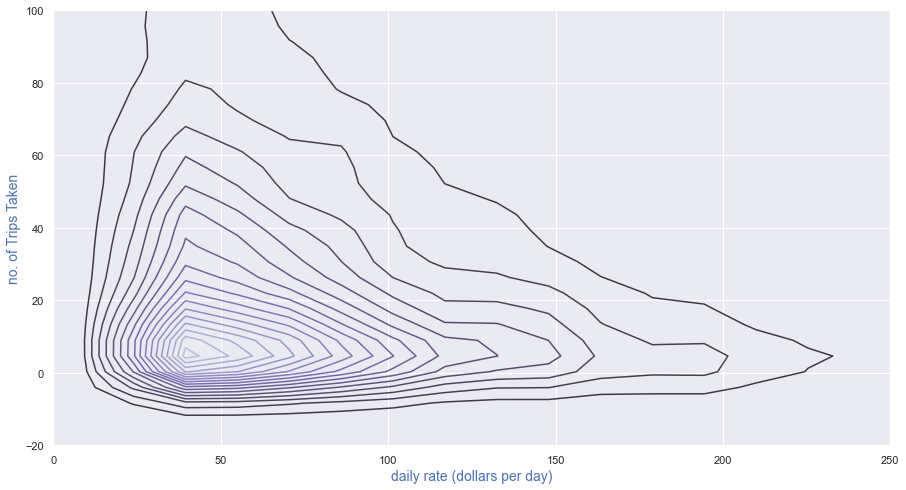

In [58]:
#sns.set(font_scale=1.3)
a4_dims = (15, 8)
x = dfall['rate.daily']
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.kdeplot(x, dfall.renterTripsTaken, shade=False, shade_lowest=False, cmap='Purples_d',  n_levels=20)
plt.xlim(0, 250)
plt.ylim(-20,100)
ax.set_ylabel('no. of Trips Taken', fontsize=14, color='b')
ax.set_xlabel('daily rate (dollars per day)', fontsize=14, color='b')